In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("../csv/customer_churn.csv")
df.drop(["customerID"], axis="columns", inplace=True)
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3779,Male,1,Yes,Yes,66,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),79.40,5154.6,Yes
480,Male,0,Yes,Yes,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,225.75,No
4955,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,69.40,69.4,Yes
3542,Male,0,Yes,Yes,29,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),55.35,1636.95,No
4311,Female,0,No,No,7,No,No phone service,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.10,293.3,Yes


In [3]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df[df.TotalCharges == ' '].shape, df.shape

((11, 20), (7043, 20))

In [5]:
df1 = df[df.TotalCharges != ' ']
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.head()

C:\Users\Артём\AppData\Local\Temp\ipykernel_17096\2570494074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
def print_obj_colls(df):
    for col in df:
        if df[col].dtypes == "object":
            print(f"{col}, {df[col].unique()}")

In [7]:
print_obj_colls(df1)

gender, ['Female' 'Male']
Partner, ['Yes' 'No']
Dependents, ['No' 'Yes']
PhoneService, ['No' 'Yes']
MultipleLines, ['No phone service' 'No' 'Yes']
InternetService, ['DSL' 'Fiber optic' 'No']
OnlineSecurity, ['No' 'Yes' 'No internet service']
OnlineBackup, ['Yes' 'No' 'No internet service']
DeviceProtection, ['No' 'Yes' 'No internet service']
TechSupport, ['No' 'Yes' 'No internet service']
StreamingTV, ['No' 'Yes' 'No internet service']
StreamingMovies, ['No' 'Yes' 'No internet service']
Contract, ['Month-to-month' 'One year' 'Two year']
PaperlessBilling, ['Yes' 'No']
PaymentMethod, ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn, ['No' 'Yes']


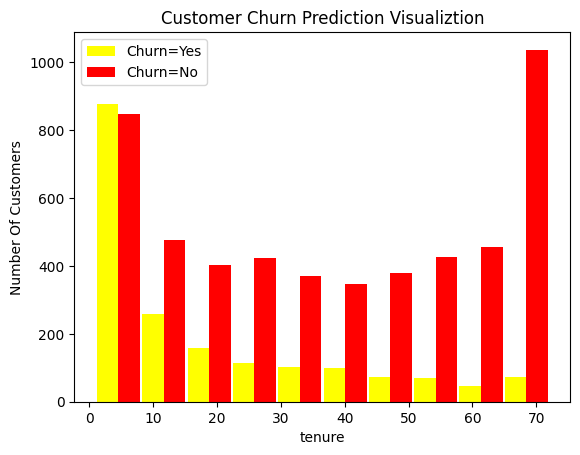

In [8]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['yellow','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [9]:
df1.replace('No phone service', 'No', inplace=True)
df1.replace('No internet service', 'No', inplace=True)

print_obj_colls(df1)

gender, ['Female' 'Male']
Partner, ['Yes' 'No']
Dependents, ['No' 'Yes']
PhoneService, ['No' 'Yes']
MultipleLines, ['No' 'Yes']
InternetService, ['DSL' 'Fiber optic' 'No']
OnlineSecurity, ['No' 'Yes']
OnlineBackup, ['Yes' 'No']
DeviceProtection, ['No' 'Yes']
TechSupport, ['No' 'Yes']
StreamingTV, ['No' 'Yes']
StreamingMovies, ['No' 'Yes']
Contract, ['Month-to-month' 'One year' 'Two year']
PaperlessBilling, ['Yes' 'No']
PaymentMethod, ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn, ['No' 'Yes']


C:\Users\Артём\AppData\Local\Temp\ipykernel_17096\431680739.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)
C:\Users\Артём\AppData\Local\Temp\ipykernel_17096\431680739.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)


In [10]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4852,Male,1,No,No,69,Yes,No,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),20.3,1356.30,No
2572,Female,0,Yes,No,71,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic),25.0,1753.00,No
6585,Female,0,Yes,Yes,43,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,20.0,817.95,No
5835,Female,0,Yes,Yes,30,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.3,602.90,No
5040,Male,0,Yes,Yes,20,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,No,Month-to-month,No,Mailed check,96.8,1826.70,No


In [11]:
yes_and_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_and_no_cols:
    df1[col].replace({"Yes" : 1, "No" : 0}, inplace=True)
    df1[col] = df1[col].astype(np.uint8)

df1.replace({"Male" : 1, "Female" : 0}, inplace=True)
df1["gender"] = df1["gender"].astype(np.uint8)
df1.sample(5)

C:\Users\Артём\AppData\Local\Temp\ipykernel_17096\2167301568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({"Yes" : 1, "No" : 0}, inplace=True)
C:\Users\Артём\AppData\Local\Temp\ipykernel_17096\2167301568.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = df1[col].astype(np.uint8)
C:\Users\Артём\AppData\Local\Temp\ipykernel_17096\2167301568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4268,1,0,1,1,35,1,0,Fiber optic,0,1,0,1,1,0,One year,1,Electronic check,89.70,3165.60,0
5179,1,0,0,0,3,1,0,DSL,0,0,0,1,1,1,Month-to-month,1,Electronic check,69.35,191.35,1
4821,1,0,1,0,56,0,0,DSL,0,0,1,1,1,1,One year,1,Bank transfer (automatic),54.05,2959.80,0
4458,1,0,1,1,38,1,1,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Electronic check,94.65,3624.30,1
5330,1,1,1,0,10,1,0,Fiber optic,0,1,1,1,1,0,Month-to-month,1,Mailed check,92.50,934.10,1


In [12]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6180,0,1,0,0,66,1,1,1,0,0,...,False,True,False,False,False,True,True,False,False,False
1341,1,0,0,1,3,1,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
2337,0,1,0,0,56,1,1,0,1,1,...,False,True,False,False,True,False,True,False,False,False
154,0,0,1,1,6,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True
5187,0,1,0,0,41,1,1,0,1,1,...,False,True,False,True,False,False,False,False,True,False


In [13]:
df2.drop(['PaymentMethod_Mailed check', 'Contract_Two year', 'InternetService_No'], axis='columns', inplace=True)
df2.dtypes

gender                                       uint8
SeniorCitizen                                int64
Partner                                      uint8
Dependents                                   uint8
tenure                                       int64
PhoneService                                 uint8
MultipleLines                                uint8
OnlineSecurity                               uint8
OnlineBackup                                 uint8
DeviceProtection                             uint8
TechSupport                                  uint8
StreamingTV                                  uint8
StreamingMovies                              uint8
PaperlessBilling                             uint8
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        uint8
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
Contract_Month-to-month        

In [14]:
df2.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,...,-0.013779,0.000048,-0.008545,0.007584,-0.011189,-0.003251,0.007755,-0.015973,0.001632,0.000844
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,0.219874,0.102411,0.150541,-0.108276,0.254923,0.137752,-0.046491,-0.016235,-0.024359,0.171322
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,0.097825,0.319072,-0.149982,-0.001043,0.001235,-0.280202,0.083067,0.111406,0.082327,-0.083207
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,-0.112343,0.064653,-0.163128,0.051593,-0.164101,-0.229715,0.069222,0.052369,0.061134,-0.149274
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.246862,0.825880,-0.354049,0.013786,0.017930,-0.649346,0.202338,0.243822,0.232800,-0.210197
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,0.248033,0.113008,0.011691,-0.452255,0.290183,-0.001243,-0.003142,0.008271,-0.006916,0.002747
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,0.490912,0.469042,0.040033,-0.200318,0.366420,-0.088558,-0.003594,0.075429,0.060319,0.083583
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.296447,0.412619,-0.171270,0.320343,-0.030506,-0.246844,0.100658,0.094366,0.115473,-0.112295
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.441529,0.510100,-0.082307,0.156765,0.165940,-0.164393,0.084113,0.086942,0.090455,-0.000364
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.482607,0.522881,-0.066193,0.145150,0.176356,-0.225988,0.102911,0.083047,0.111252,-0.003308


Doesn't help, jsut the other way around, without htis parametrs 0.81 accuracy, with 0.85

In [15]:
# df2.drop(['gender', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 
#           'StreamingTV', 'StreamingMovies'], axis='columns', inplace=True)

In [16]:
scaler = MinMaxScaler()
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
4326,1,0,0,0,0.000000,1,0,0,0,0,...,0.704975,0.008112,1,False,True,True,False,False,False,True
2923,1,0,0,0,0.746479,1,0,1,0,1,...,0.711940,0.536372,0,False,True,True,False,False,False,False
5147,1,0,0,0,0.380282,0,0,0,0,0,...,0.117910,0.091397,0,True,False,True,False,False,True,False
6020,0,0,1,1,0.464789,0,0,1,0,1,...,0.427861,0.227833,0,True,False,False,True,False,False,False
3204,1,0,0,1,0.549296,1,0,0,0,0,...,0.021393,0.096480,0,False,False,False,True,True,False,False


In [17]:
bool_cols = ['InternetService_DSL', 'InternetService_Fiber optic', 'Contract_Month-to-month',
             'Contract_One year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)',
             'PaymentMethod_Electronic check']

for col in bool_cols:
    df2[col] = df2[col].astype(np.uint8)

df2.dtypes

gender                                       uint8
SeniorCitizen                                int64
Partner                                      uint8
Dependents                                   uint8
tenure                                     float64
PhoneService                                 uint8
MultipleLines                                uint8
OnlineSecurity                               uint8
OnlineBackup                                 uint8
DeviceProtection                             uint8
TechSupport                                  uint8
StreamingTV                                  uint8
StreamingMovies                              uint8
PaperlessBilling                             uint8
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
Contract_Month-to-month        

In [18]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, )

In [19]:
X.shape, len(X_train.columns)

((7032, 23), 23)

In [22]:
model = keras.Sequential([
    keras.layers.Dense(23, input_shape = (23,), activation='relu'),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
154/154 [==============================] - 1s 1ms/step - loss: 0.5748 - accuracy: 0.6892
Epoch 2/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7737
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4456 - accuracy: 0.7911
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7928
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.7995
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4204 - accuracy: 0.7985
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.8017
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8005
Epoch 9/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8023
Epoch 10/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4133 - accura

In [23]:
yp = model.predict(X_test)
y_pred = []

for ans in yp:
    if ans > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_pred[10:20], y_test[10:20]

66/66 [==============================] - 0s 1ms/step


([0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
 5586    0
 2111    0
 1849    1
 2420    0
 5367    0
 5909    0
 1256    0
 5383    1
 6760    1
 6367    0
 Name: Churn, dtype: uint8)

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1573
           1       0.61      0.53      0.57       537

    accuracy                           0.79      2110
   macro avg       0.73      0.71      0.72      2110
weighted avg       0.79      0.79      0.79      2110



Text(95.72222222222221, 0.5, 'Truth')

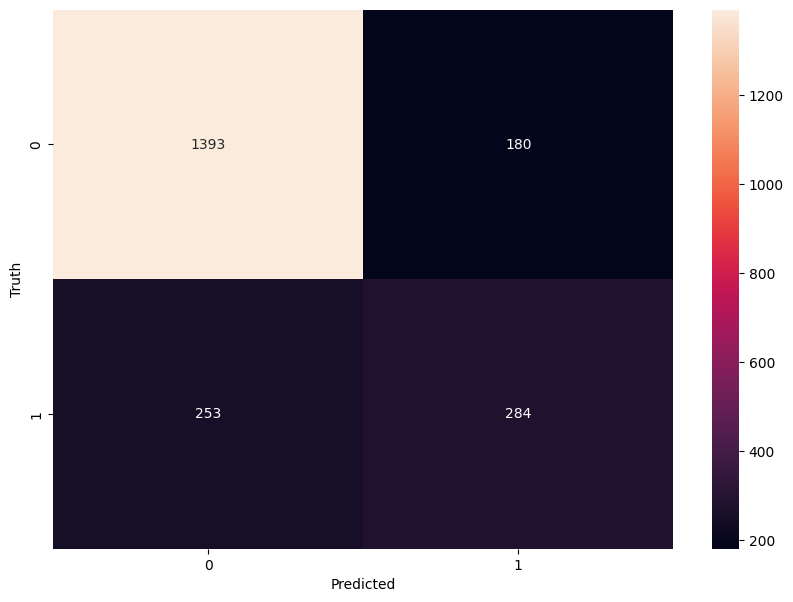

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')